# K均值图像压缩

In [100]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 获取实验数据并展示分析

In [101]:
def getData(url):
    data=np.array(loadmat(url)['X'])
    return data

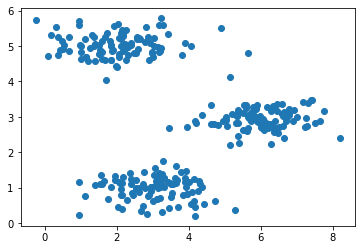

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

In [102]:
data=getData('./data/ex7data2.mat')
plt.scatter(data[:,0],data[:,1])
plt.show()
data[:5,:]


观察实验数据可知，本次的k均值实验要将数据分成三份，x在-1到9，y在0-6  
### 随机生成三个点作为中心

In [103]:
centerNum=3
x=np.random.random(centerNum)*10-1
y=np.random.random(centerNum)*6

### 生成一个数组，为数据集做聚类标识1，2，3

In [104]:
mark=np.zeros(data.shape[0])

### 为所有点重新分配中心

In [105]:
def reDistributionCenter(x,y,mark):
    notChange=True#标记是否已经聚类好，也就是notChange为true
    for i in range(data.shape[0]):
        min=100000
        minIndex=0
        for j in range(centerNum):#计算第i个点里那个中心最近
            l2=np.power(data[i,0]-x[j],2)+np.power(data[i,1]-y[j],2)
            if(l2<min):
                min=l2
                minIndex=j
        if(mark[i]!=minIndex+1):
            mark[i]=minIndex+1#把i点分配到距离最近的中心
            notChange=False#说明还有改变中心的点，
    return x,y,mark,notChange

### 重新计算聚类中心点

In [106]:

def computeNewCenter(x,y,mark):
    for i in range(centerNum):
        x[i]=data[mark==(i+1)][:,0].mean()
        y[i]=data[mark==(i+1)][:,1].mean()
    return x,y

### 不断循环分配中心点，计算新的中心点，直到不在分配中心点

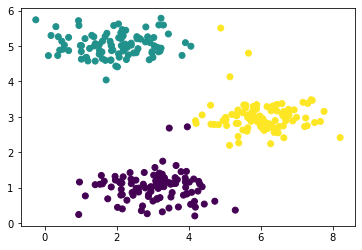

In [107]:
notChange=False
while(not notChange):
# print("分类前mark",mark)
    x,y,mark,notChange=reDistributionCenter(x,y,mark)#分配中心点
    x,y=computeNewCenter(x,y,mark)#计算新的中心点
# print("分类后mark",mark)
# print("聚类中心",x,y)
plt.scatter(data[:,0],data[:,1],c=mark)
plt.show()
